## Assignment problem statement

Take a trigonometric function and a choose an error function (N(0, sigma-sq)). Generate  data  set of 10,000 instances. Fit polynomials of order 1 - 10 and estimate and plot total error, Bias, Variance,   

training and validation error for each  using 10-fold cross validation.   Create the folds using Python function and compute all errors using the equations given in textbook.  Select the optimal model.

For the selected model, estimate and plot total error, Bias, Variance,    training and validation error for training set sizes  1K, 2K, ... 10K. Use 10-fold cross validation for each training set, and the functions coded earlier for estimating the error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_dataset(num_instances, sigma, trig_func):
    dataset = []
    for _ in range(num_instances):
        angle = np.random.uniform(0, 2 * np.pi)  # Random angle between 0 and 2*pi
        error = np.random.normal(0, sigma)  # Random error from a normal distribution
        value = trig_func(angle) + error  # Compute the value with the user-defined trigonometric function and error
        dataset.append([angle, value])
    return dataset

num_instances = 10000
sigma = 0.2  # Adjust the value of sigma to control the spread of the errors

# Get the user's input for the trigonometric function
trig_func_input = input("Enter the trigonometric function (e.g., 'np.sin' for sine): ")
trig_func = eval(trig_func_input)  # Evaluate the user's input to obtain the function

dataset = generate_dataset(num_instances, sigma, trig_func)

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset, columns=['x', 'y'])
df.head()

Enter the trigonometric function (e.g., 'np.sin' for sine): np.cos


,x,y
0,0.886592,0.663678
1,5.263931,-0.076391
2,5.181181,0.407326
3,3.097560,-1.010219
4,5.657369,1.156299


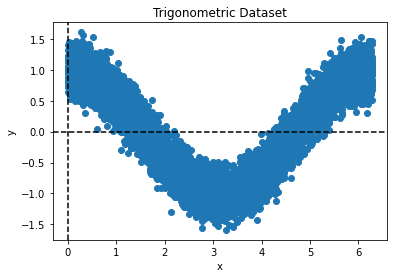

In [3]:
#plotting the dataset that we have created in above
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric Dataset')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axvline(x=0, color='black', linestyle='--')  # Add a vertical line at x=0
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [5]:
def calculate_values(dataset, train_indices, test_indices, degree):
    x_train = dataset[train_indices, 0]
    y_train = dataset[train_indices, 1]
    x_test = dataset[test_indices, 0]
    y_test = dataset[test_indices, 1]
    
    coefficients = np.polyfit(x_train, y_train, degree)
    y_train_pred = np.polyval(coefficients, x_train)
    y_test_pred = np.polyval(coefficients, x_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    bias = np.mean((y_test - np.mean(y_test_pred))**2)
    variance = np.var(y_test_pred)
    
    total_error = (bias+variance)
    
    return train_error, test_error, bias, variance, total_error

In [6]:
def fit_polynomial(dataset, degrees, cv_folds=10):
    kf = KFold(n_splits=cv_folds)
    total_errors = []
    biases = []
    variances = []
    train_errors = []
    test_errors = []
    
    for d in degrees:
        total_errors.append([])
        biases.append([])
        variances.append([])
        train_errors.append([])
        test_errors.append([])   
    
    for train_indices, test_indices in kf.split(dataset):
        for idx, degree in enumerate(degrees):
            
            train_error, test_error, bias, variance, total_error = calculate_values(dataset, train_indices, test_indices, degree)
            total_errors[idx].append(total_error)
            biases[idx].append(bias)
            variances[idx].append(variance)
            train_errors[idx].append(train_error)
            test_errors[idx].append(test_error)

    for idx in range(0, len(degrees)):
        total_errors[idx] = np.mean(total_errors[idx])
        biases[idx] = np.mean(biases[idx])
        variances[idx] = np.mean(variances[idx])
        train_errors[idx] = np.mean(train_errors[idx])
        test_errors[idx] = np.mean(test_errors[idx])
    return total_errors, biases, variances, train_errors, test_errors

In [7]:
degrees = range(1, 11)
total_errors, biases, variances, train_errors, test_errors = fit_polynomial(df.values, degrees)
total_errors, biases, variances, train_errors, test_errors

([0.5465595329755364,
  1.0126974875975154,
  1.012772782953806,
  1.0506102946207634,
  1.050640720851708,
  1.0510595051649907,
  1.0510498202754444,
  1.0510681752768294,
  1.0510682542267888,
  1.0510601645380837],
 [0.5465283634942902,
  0.5459579108609959,
  0.5459577791525363,
  0.5459745603823085,
  0.5459753596912456,
  0.5459807654994087,
  0.5459808345711172,
  0.5459825343526014,
  0.5459823333823735,
  0.5459824866027405],
 [3.116948124615129e-05,
  0.46673957673651933,
  0.4668150038012698,
  0.5046357342384546,
  0.504665361160462,
  0.505078739665582,
  0.5050689857043271,
  0.505085640924228,
  0.5050859208444157,
  0.5050776779353431],
 [0.5463705120481384,
  0.07912717748099458,
  0.07912461759890536,
  0.04105199106882424,
  0.04104360430778322,
  0.04065047123687402,
  0.04064885391746105,
  0.0406347085868562,
  0.040634250284347265,
  0.04063357233017479],
 [0.5468677106738592,
  0.07918851454424408,
  0.07921857323438429,
  0.041112035090625235,
  0.041115381292

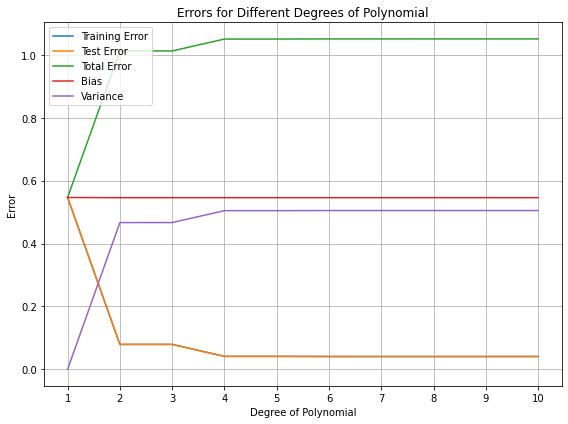

In [8]:
def plot_errors(degrees, total_errors, biases, variances, train_errors, test_errors):

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(degrees, train_errors, label='Training Error')
    ax.plot(degrees, test_errors, label='Test Error')
    ax.plot(degrees, total_errors, label='Total Error')
    ax.plot(degrees, biases, label='Bias')
    ax.plot(degrees, variances, label='Variance')
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('Error')
    ax.set_title('Errors for Different Degrees of Polynomial')
    ax.legend()
    ax.grid(True)
    plt.xticks(degrees)
    plt.tight_layout()
    plt.show()
    
plot_errors(degrees, total_errors, biases, variances, train_errors, test_errors)

In [9]:
optimal_degree_idx = np.argmin(test_errors)
optimal_degree = degrees[optimal_degree_idx]
print(optimal_degree)

6


In [10]:
training_set_sizes = np.arange(1000, 10001, 1000)
training_set_sizes

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])

In [11]:
def fit_optimal_polynomial(dataset, degree, sizes):
    total_errors = []
    biases = []
    variances = []
    train_errors = []
    test_errors = []
    
    for idx, size in enumerate(sizes):
        partial_dataset = np.array(dataset[:size])  # Convert the dataset to a numpy array
        total_error, bias, variance, train_error, test_error = fit_polynomial(partial_dataset, [degree])
        total_errors.append(total_error[0])
        biases.append(bias[0])
        variances.append(variance[0])
        train_errors.append(train_error[0])
        test_errors.append(test_error[0])
    return total_errors, biases, variances, train_errors, test_errors

In [12]:
total_errors, biases, variances, train_errors, test_errors = fit_optimal_polynomial(df, 
                                                                                    optimal_degree, 
                                                                                    training_set_sizes)
# total_errors, biases, variances, train_errors, test_errors
from tabulate import tabulate
# error_table = [["Training Set Size", "Total Error", "Bias", "Variance", "Training Error", "Validation Error"]]
# error_table.append([[training_set_sizes], fit_optimal_polynomial(df, np.argmin(test_errors), training_set_sizes)])
# print(tabulate(error_table, headers="firstrow"))
# print(tabulate([training_set_sizes, total_errors, biases, variances, train_errors, test_errors]))

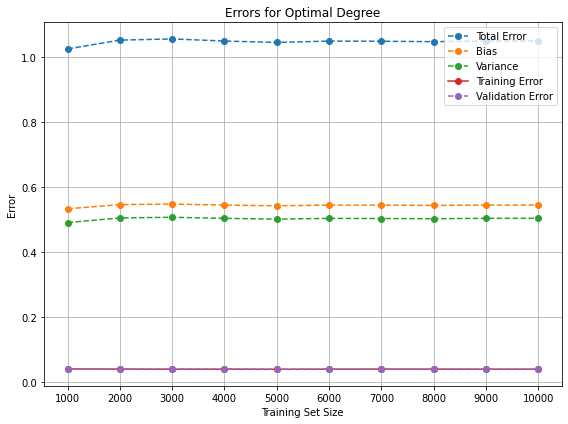

In [13]:
def plot_optimal_graph(sizes, total_errors, biases, variances, train_errors, test_errors):

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(training_set_sizes, total_errors, label='Total Error', linestyle='dashed', marker='o')
    ax.plot(training_set_sizes, biases, label='Bias', linestyle='dashed', marker='o')
    ax.plot(training_set_sizes, variances, label='Variance', linestyle='dashed', marker='o')
    ax.plot(training_set_sizes, train_errors, label='Training Error', linestyle='solid', marker='o')
    ax.plot(training_set_sizes, test_errors, label='Validation Error', linestyle='dashed', marker='o')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Error')
    ax.set_title('Errors for Optimal Degree')
    ax.legend()
    ax.grid(True)
    plt.xticks(sizes)
    plt.tight_layout()
    plt.show()
    
plot_optimal_graph(training_set_sizes, total_errors, biases, variances, train_errors, test_errors)